# Rock Paper Scissors (using Convolutional Neural Network)

> - 🤖 See [full list of Machine Learning Experiments](https://github.com/trekhleb/machine-learning-experiments) on **GitHub**<br/><br/>
> - ▶️ **Interactive Demo**: [try this model and other machine learning experiments in action](https://trekhleb.github.io/machine-learning-experiments/)

## Experiment overview

In this experiment we will build a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN) model using [Tensorflow](https://www.tensorflow.org/) to recognize Rock-Paper-Scissors signs (gestures) on the photo.

A **convolutional neural network** (CNN, or ConvNet) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other.

![rock_paper_scissors_cnn.jpg](../../demos/src/images/rock_paper_scissors_cnn.jpg)

_Inspired by [Getting started with TensorFlow 2.0](https://medium.com/@himanshurawlani/getting-started-with-tensorflow-2-0-faf5428febae) article._

## Importing dependencies

In [0]:
# Selecting Tensorflow version v2 (the command is relevant for Colab only).
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

2023-06-21 01:33:30.286531: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-21 01:33:30.298214: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 01:33:30.350275: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-21 01:33:30.350924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-21 01:33:30.977507: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Python version: 3.10.9
Tensorflow version: 2.12.0
Keras version: 2.12.0


## Configuring TensorBoard

We will use TensorBoard as a helper to debug the model training process.

In [2]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [3]:
# Clear any logs from previous runs.
!rm -rf ./logs/

## Loading the dataset

We will download Rock-Paper-Scissors dataset from [TensorFlow Datasets](https://github.com/tensorflow/datasets) collection. To do that we loaded a `tensorflow_datasets` module.

`tensorflow_datasets` defines a collection of datasets ready-to-use with TensorFlow.

Each dataset is defined as a [tfds.core.DatasetBuilder](https://www.tensorflow.org/datasets/api_docs/python/tfds/core/DatasetBuilder), which encapsulates the logic to download the dataset and construct an input pipeline, as well as contains the dataset documentation (version, splits, number of examples, etc.).

In [4]:
# See available datasets
tfds.list_builders()

2023-06-21 01:33:49.985396: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [5]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling tmp/rock_paper_scissors/3.0.0.incompleteDZKY71/rock_paper_scissors-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling tmp/rock_paper_scissors/3.0.0.incompleteDZKY71/rock_paper_scissors-test.tfrecord*...:   0%|         …

Dataset rock_paper_scissors downloaded and prepared to tmp/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


2023-06-21 01:34:25.729033: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
print('Raw train dataset:', dataset_train_raw)
print('Raw train dataset size:', len(list(dataset_train_raw)), '\n')

print('Raw test dataset:', dataset_test_raw)
print('Raw test dataset size:', len(list(dataset_test_raw)), '\n')

Raw train dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


2023-06-21 01:34:25.828600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]
2023-06-21 01:34:25.828871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]


Raw train dataset size: 2520 

Raw test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Raw test dataset size: 372 



2023-06-21 01:34:26.330709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-06-21 01:34:26.330952: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]


In [7]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path=PosixGPath('/tmp/tmp8ficmha3tfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [8]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [9]:
INPUT_IMG_SIZE_ORIGINAL = dataset_info.features['image'].shape[0]
INPUT_IMG_SHAPE_ORIGINAL = dataset_info.features['image'].shape

INPUT_IMG_SIZE_REDUCED = INPUT_IMG_SIZE_ORIGINAL // 2
INPUT_IMG_SHAPE_REDUCED = (
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SHAPE_ORIGINAL[2]
)

# Here we may switch between bigger or smaller image sized that we will train our model on.
INPUT_IMG_SIZE = INPUT_IMG_SIZE_REDUCED
INPUT_IMG_SHAPE = INPUT_IMG_SHAPE_REDUCED

print('Input image size (original):', INPUT_IMG_SIZE_ORIGINAL)
print('Input image shape (original):', INPUT_IMG_SHAPE_ORIGINAL)
print('\n')
print('Input image size (reduced):', INPUT_IMG_SIZE_REDUCED)
print('Input image shape (reduced):', INPUT_IMG_SHAPE_REDUCED)
print('\n')
print('Input image size:', INPUT_IMG_SIZE)
print('Input image shape:', INPUT_IMG_SHAPE)

Input image size (original): 300
Input image shape (original): (300, 300, 3)


Input image size (reduced): 150
Input image shape (reduced): (150, 150, 3)


Input image size: 150
Input image shape: (150, 150, 3)


In [15]:
# Function to convert label ID to labels string.
get_label_name = dataset_info.features['label'].int2str

In [16]:
print(get_label_name(0));
print(get_label_name(1));
print(get_label_name(2));

rock
paper
scissors


## Exploring the dataset

In [17]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        # plt.axis('Off')
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

2023-06-21 01:35:07.250927: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
2023-06-21 01:35:07.251181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


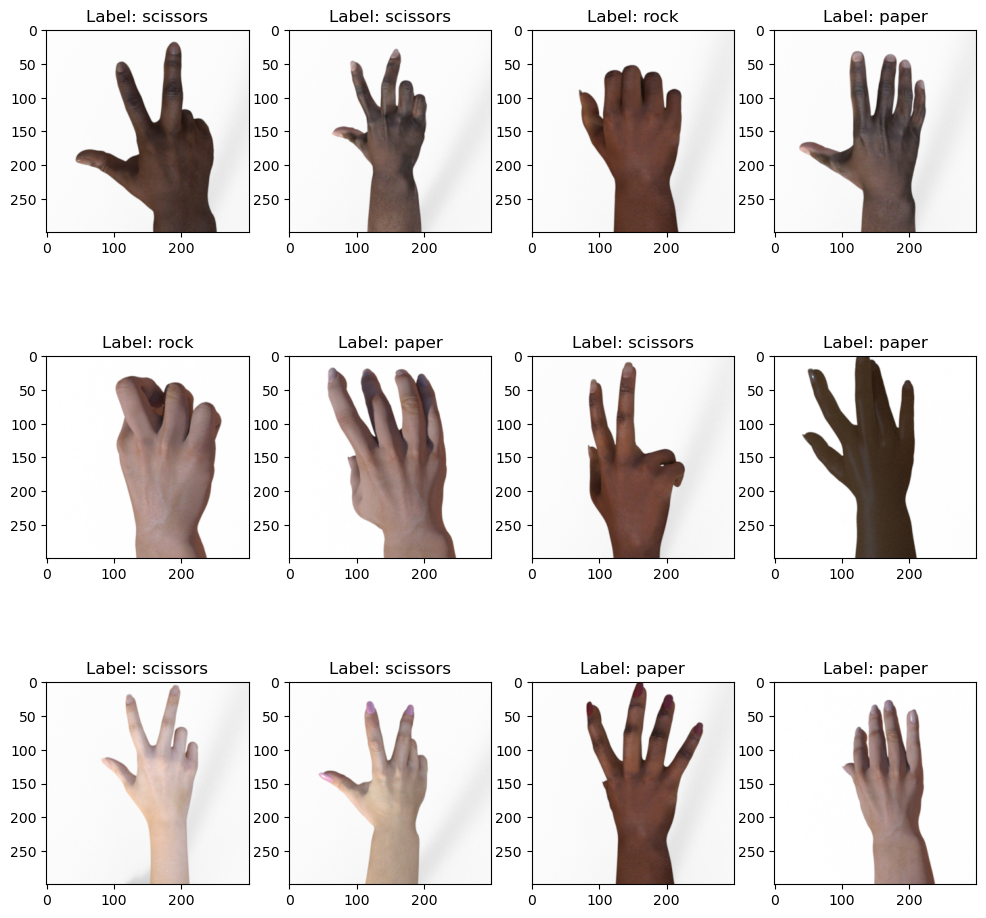

In [18]:
# Explore raw training dataset images.
preview_dataset(dataset_train_raw)

In [19]:
# Explore what values are used to represent the image. 
(first_image, first_lable) = list(dataset_train_raw.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (300, 300, 3) 

[[[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [253 253 253]
  ...
  [250 250 250]
  [251 251 251]
  [249 249 249]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [252 252 252]]

 ...

 [[252 252 252]
  [251 251 251]
  [252 252 252]
  ...
  [247 247 247]
  [249 249 249]
  [248 248 248]]

 [[253 253 253]
  [253 253 253]
  [251 251 251]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[252 252 252]
  [253 253 253]
  [252 252 252]
  ...
  [248 248 248]
  [247 247 247]
  [250 250 250]]]


2023-06-21 01:35:15.346803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]
2023-06-21 01:35:15.347101: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]


## Pre-processing the dataset

In [20]:
def format_example(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [21]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [22]:
# Explore what values are used to represent the image. 
(first_image, first_lable) = list(dataset_train.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (150, 150, 3) 

[[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.9705882  0.9705882 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9754902  0.9754902  0.9754902 ]]

 [[0.9882353  0.9882353  0.9882353

2023-06-21 01:35:37.918579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [2]
	 [[{{node Placeholder/_2}}]]
2023-06-21 01:35:37.918838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


2023-06-21 01:35:40.132666: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [2]
	 [[{{node Placeholder/_2}}]]
2023-06-21 01:35:40.132947: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


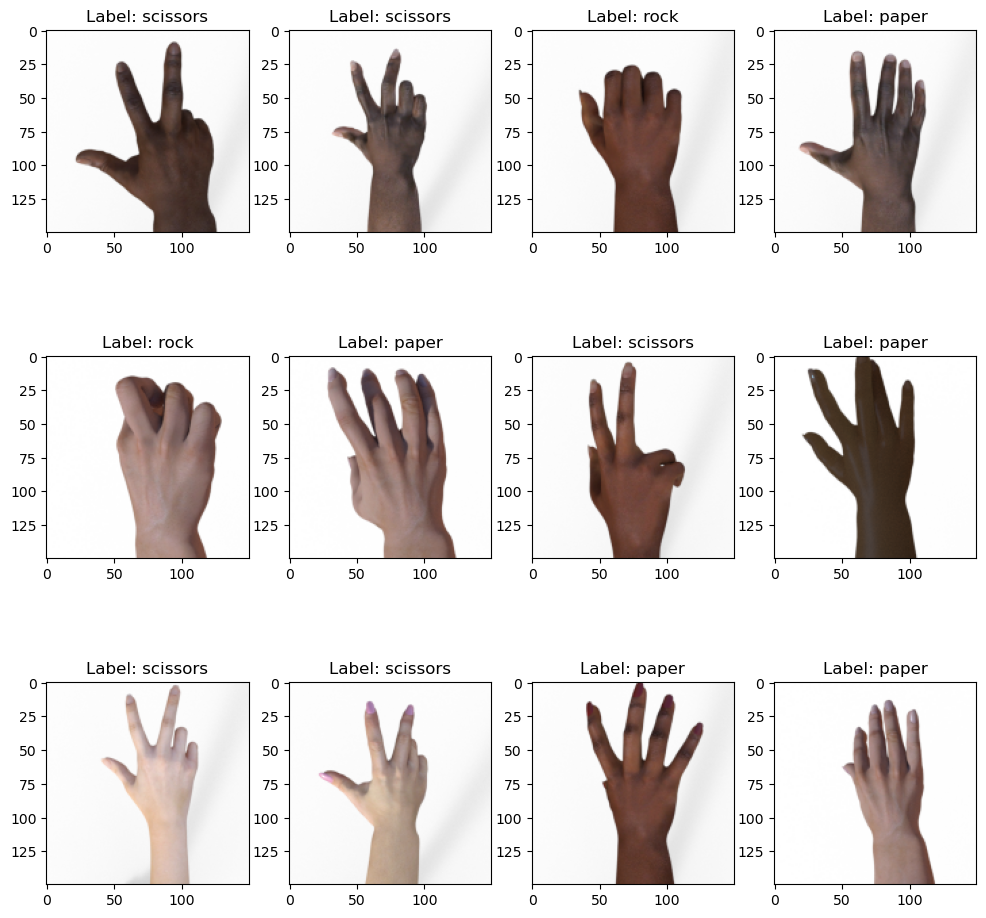

In [23]:
# Explore preprocessed training dataset images.
preview_dataset(dataset_train)

## Data augmentation

One of the way to fight the [model overfitting](https://en.wikipedia.org/wiki/Overfitting) and to generalize the model to a broader set of examples is to augment the training data.

As you saw from the previous section all training examples have a white background and vertically positioned right hands. But what if the image with the hand will be horizontally positioned or what if the background will not be that bright. What if instead of a right hand the model will see a left hand. To make our model a little bit more universal we're going to flip and rotate images and also to adjust background colors.   

You may read more about a [Simple and efficient data augmentations using the Tensorfow tf.Data and Dataset API](https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/).

In [24]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

In [25]:
def augment_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_hue(image, max_delta=0.08)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image

In [26]:
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

In [27]:
def augment_inversion(image: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    return image

In [28]:
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

In [29]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_color(image)
    image = augment_rotation(image)
    image = augment_zoom(image)
    image = augment_inversion(image)
    return image, label

In [30]:
dataset_train_augmented = dataset_train.map(augment_data)

2023-06-21 01:35:57.279903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]
2023-06-21 01:35:57.280194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


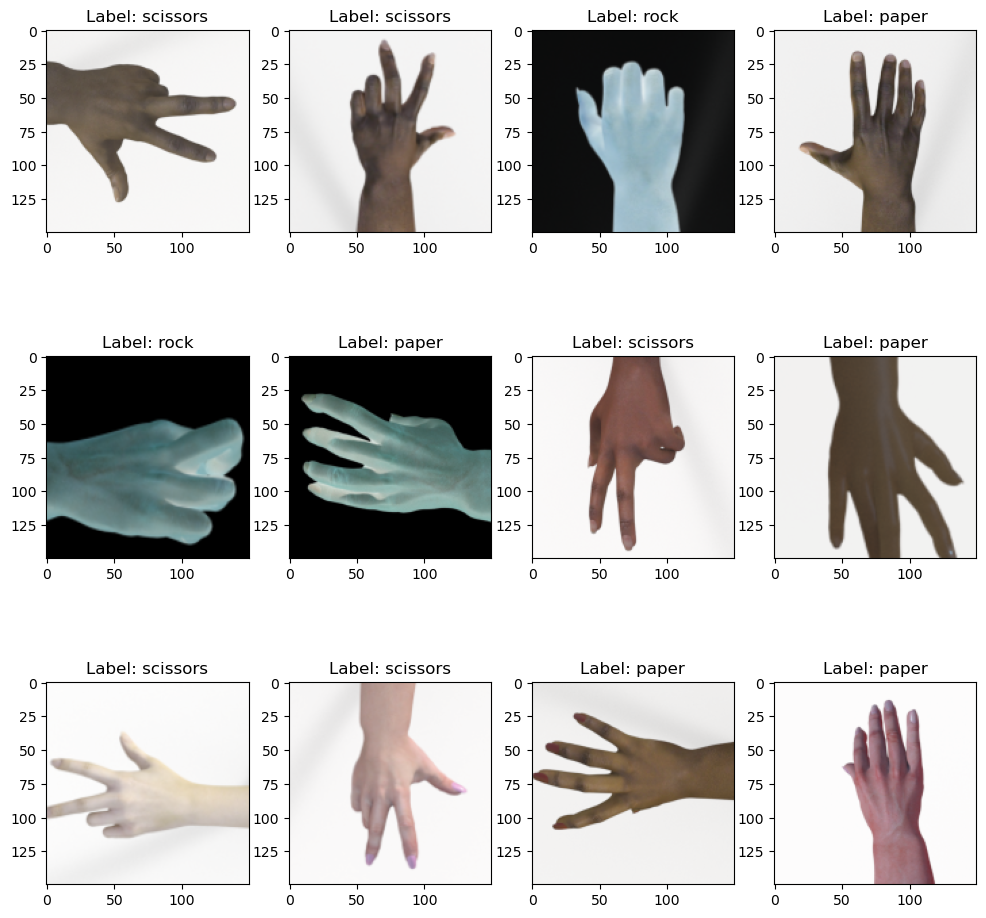

In [31]:
# Explore augmented training dataset.
preview_dataset(dataset_train_augmented)

2023-06-21 01:36:00.237902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-06-21 01:36:00.238194: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]


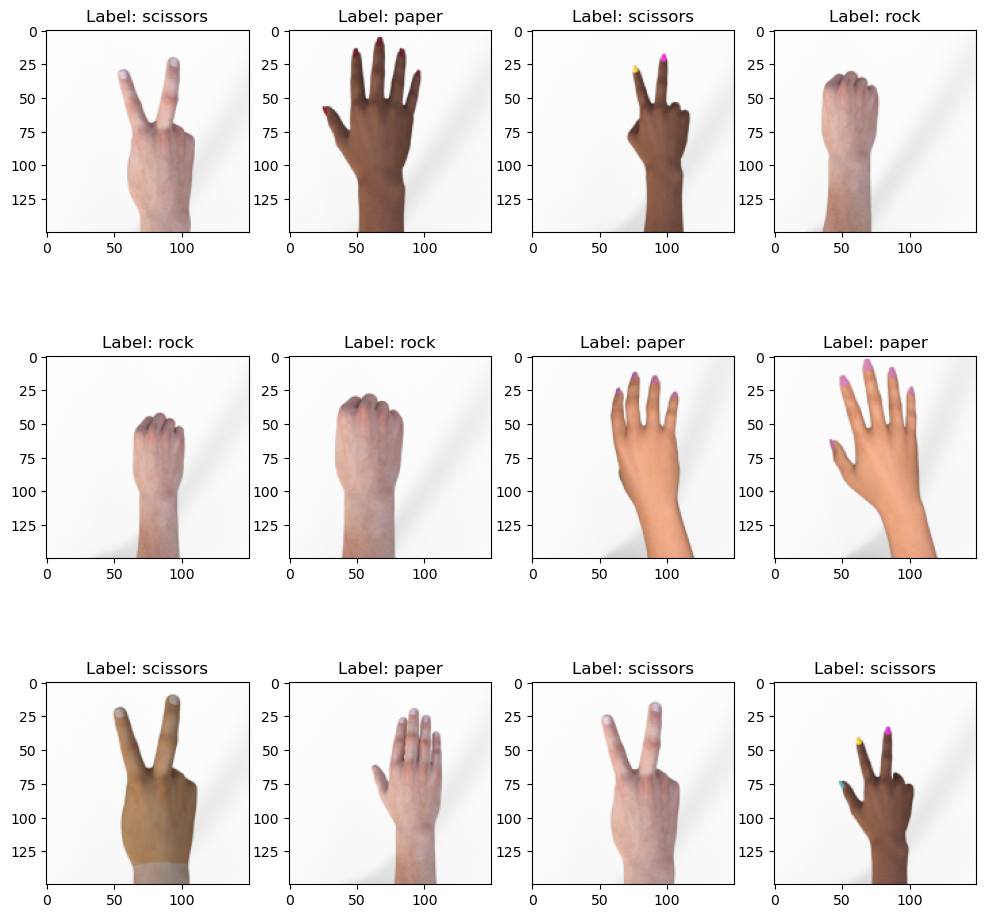

In [32]:
# Explore test dataset.
preview_dataset(dataset_test)

## Data shuffling and batching

We don't want our model to learn anything from the order or grouping of the images in the dataset. To avoid that we will shuffle the training examples. Also we're going to split the training set by batches to speed up training process and make it less memory consuming.

In [33]:
BATCH_SIZE = 32

dataset_train_augmented_shuffled = dataset_train_augmented.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_augmented_shuffled = dataset_train_augmented.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_augmented_shuffled = dataset_train_augmented_shuffled.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [34]:
print(dataset_train_augmented_shuffled)
print(dataset_test_shuffled)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


2023-06-21 01:36:04.505292: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]
2023-06-21 01:36:04.505610: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [2]
	 [[{{node Placeholder/_4}}]]


Label batch shape: (32,) 

Image batch shape: (32, 150, 150, 3) 

Label batch: [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 2 2 0 0] 

First batch image: [[[0.01815003 0.01970232 0.02045208]
  [0.02266473 0.02421701 0.02496678]
  [0.02085882 0.02241117 0.02316093]
  ...
  [0.03440279 0.03595507 0.03670484]
  [0.03711164 0.03866398 0.03941369]
  [0.03440279 0.03595507 0.03670484]]

 [[0.02085882 0.02241117 0.02316093]
  [0.02176178 0.02331412 0.02406389]
  [0.02266473 0.02421701 0.02496678]
  ...
  [0.03982043 0.04137272 0.04212248]
  [0.03620869 0.03776097 0.03851074]
  [0.03530574 0.03685808 0.03760785]]

 [[0.02266473 0.02421701 0.02496678]
  [0.02176178 0.02331412 0.02406389]
  [0.02085882 0.02241117 0.02316093]
  ...
  [0.03711164 0.03866398 0.03941369]
  [0.03440279 0.03595507 0.03670484]
  [0.03259695 0.03414929 0.034899  ]]

 ...

 [[0.0136354  0.01518768 0.01593745]
  [0.01544118 0.01699352 0.01774329]
  [0.01544118 0.01699352 0.01774329]
  ...
  [0.02356768 0.02511

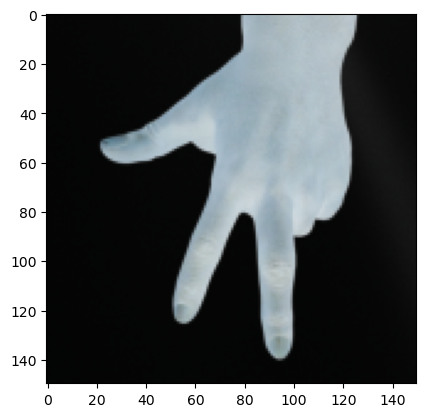

In [35]:
# Debugging the batches using conversion to Numpy arrays.
batches = tfds.as_numpy(dataset_train_augmented_shuffled)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')
    
    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        # Break to shorten the output.
        break
    # Break to shorten the output.
    break

## Creating the model

In [74]:
model = tf.keras.models.Sequential()

# First convolution.
model.add(tf.keras.layers.Convolution2D(
    input_shape=INPUT_IMG_SHAPE,
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu,
    name ='conv1'
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name ='maxpool_1'
))

# Second convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=2,
    kernel_size=3,
    activation=tf.keras.activations.relu,
    name ='conv2'
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name ='maxpool_2'
))

# Third convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=18,
    kernel_size=3,
    activation=tf.keras.activations.relu,
    name ='conv3'
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name ='maxpool_3'
))

# Fourth convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=5,
    kernel_size=3,
    activation=tf.keras.activations.relu,
    name ='conv4'
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),
    name ='maxpool_4'
))

# Flatten the results to feed into dense layers.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

# 512 neuron dense layer.
model.add(tf.keras.layers.Dense(
    units=5,
    activation=tf.keras.activations.relu,
    name ='dense1'
))

# Output layer.
model.add(tf.keras.layers.Dense(
    units=NUM_CLASSES,
    activation=tf.keras.activations.softmax,
    name ='dense2'
))

In [75]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 148, 148, 64)      1792      
                                                                 
 maxpool_1 (MaxPooling2D)    (None, 74, 74, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 72, 72, 2)         1154      
                                                                 
 maxpool_2 (MaxPooling2D)    (None, 36, 36, 2)         0         
                                                                 
 conv3 (Conv2D)              (None, 34, 34, 18)        342       
                                                                 
 maxpool_3 (MaxPooling2D)    (None, 17, 17, 18)        0         
                                                                 
 conv4 (Conv2D)              (None, 15, 15, 5)       

In [76]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compiling the model

In [77]:
# adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Training the model

In [78]:
steps_per_epoch = NUM_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUM_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [79]:
!rm -rf tmp/checkpoints
!rm -rf logs

In [80]:
# Preparing callbacks.
os.makedirs('logs/fit', exist_ok=True)
tensorboard_log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1
)

os.makedirs('tmp/checkpoints', exist_ok=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_accuracy'
    # monitor='val_loss'
)

In [81]:
training_history = model.fit(
    x=dataset_train_augmented_shuffled.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        # early_stopping_callback,
        tensorboard_callback
    ],
    verbose=1
)

Epoch 1/15


2023-06-21 02:03:04.935854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
2023-06-21 02:03:04.936154: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]


78/78 [==============================] - ETA: 0s - loss: 1.0974 - accuracy: 0.3570

2023-06-21 02:03:18.047789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-06-21 02:03:18.048120: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]


78/78 [==============================] - 14s 171ms/step - loss: 1.0974 - accuracy: 0.3570 - val_loss: 1.0926 - val_accuracy: 0.3210
Epoch 2/15
78/78 [==============================] - 14s 178ms/step - loss: 1.0619 - accuracy: 0.4293 - val_loss: 1.2437 - val_accuracy: 0.3580
Epoch 3/15
78/78 [==============================] - 13s 170ms/step - loss: 1.0422 - accuracy: 0.4638 - val_loss: 1.1783 - val_accuracy: 0.4659
Epoch 4/15
78/78 [==============================] - 13s 172ms/step - loss: 0.9882 - accuracy: 0.5173 - val_loss: 1.1559 - val_accuracy: 0.4830
Epoch 5/15
78/78 [==============================] - 13s 173ms/step - loss: 0.9360 - accuracy: 0.5667 - val_loss: 1.1544 - val_accuracy: 0.4858
Epoch 6/15
78/78 [==============================] - 14s 175ms/step - loss: 0.8757 - accuracy: 0.5840 - val_loss: 1.1458 - val_accuracy: 0.4347
Epoch 7/15
78/78 [==============================] - 13s 171ms/step - loss: 0.8628 - accuracy: 0.6125 - val_loss: 1.1459 - val_accuracy: 0.4148
Epoch 8/15

In [87]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

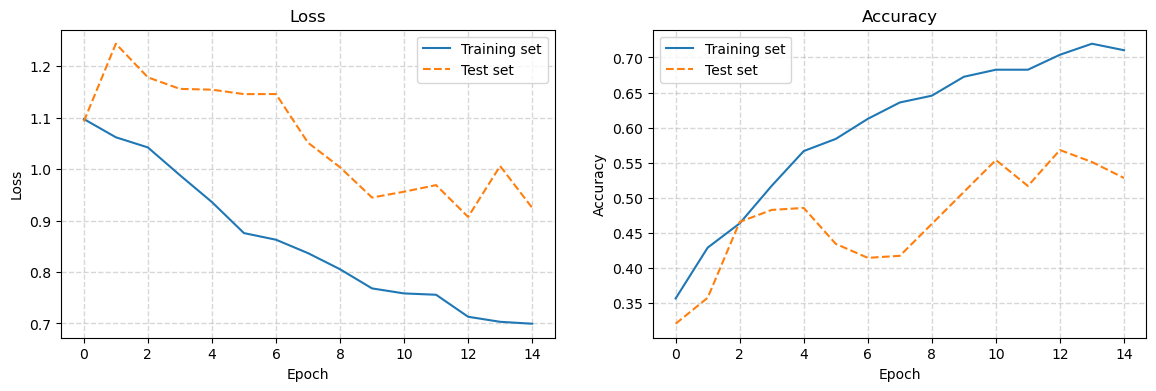

In [88]:
render_training_history(training_history)

## Debugging the training with TensorBoard

In [89]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 24787), started 0:18:40 ago. (Use '!kill 24787' to kill it.)

## Evaluating model accuracy

In [90]:
# %%capture
train_loss, train_accuracy = model.evaluate(
    x=dataset_train.batch(BATCH_SIZE).take(NUM_TRAIN_EXAMPLES)
)

test_loss, test_accuracy = model.evaluate(
    x=dataset_test.batch(BATCH_SIZE).take(NUM_TEST_EXAMPLES)
)

 2/79 [..............................] - ETA: 4s - loss: 0.5966 - accuracy: 0.7812

2023-06-21 02:06:45.794037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [2]
	 [[{{node Placeholder/_1}}]]
2023-06-21 02:06:45.794317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]


 3/12 [======>.......................] - ETA: 0s - loss: 0.9193 - accuracy: 0.5312

2023-06-21 02:06:50.065304: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [1]
	 [[{{node Placeholder/_2}}]]
2023-06-21 02:06:50.065612: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]


12/12 [==============================] - 1s 50ms/step - loss: 0.9129 - accuracy: 0.5323


In [91]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)
print('\n')
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

Training loss:  0.5685825943946838
Training accuracy:  0.8158730268478394


Test loss:  0.9128713011741638
Test accuracy:  0.5322580933570862


## Saving the model

In [92]:
import hls4ml

# config = hls4ml.utils.config_from_keras_model(model, granularity='model')
# print("-----------------------------------")
# print("Configuration")
# # plotting.print_dict(config)
# print("-----------------------------------")
# hls_model = hls4ml.converters.convert_from_keras_model(
#     model, hls_config=config, output_dir='model_1/hls4ml_prj', part='xczu7ev-ffvc1156-2-e'
# )


hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name')
hls_config['Model']['ReuseFactor'] = 1
hls_config['LayerName']['conv1']['Strategy'] = 'Latency'
hls_config['LayerName']['conv2']['Strategy'] = 'Latency'

hls_config['LayerName']['maxpool_1']['Strategy'] = 'Latency'
hls_config['LayerName']['conv2']['Strategy'] = 'Latency'
hls_config['LayerName']['maxpool_2']['Strategy'] = 'Latency'
hls_config['LayerName']['maxpool_3']['Strategy'] = 'Latency'
hls_config['LayerName']['maxpool_4']['Strategy'] = 'Latency'
 
hls_config['Model']['Precision'] = 'ap_fixed<16,6>'
hls_config['LayerName']['dense2']['Strategy'] = 'Stable'
#plotting.print_dict(hls_config_aq)

cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg['HLSConfig'] = hls_config
cfg['KerasModel'] = model
cfg['OutputDir'] = 'CNN_RPS/'
cfg['XilinxPart'] = 'xczu7evffvc1156-2'

hls_model = hls4ml.converters.keras_to_hls(cfg )
hls_model.compile()


Interpreting Sequential
Topology:
Layer name: conv1_input, layer type: InputLayer, input shapes: [[None, 150, 150, 3]], output shape: [None, 150, 150, 3]
Layer name: conv1, layer type: Conv2D, input shapes: [[None, 150, 150, 3]], output shape: [None, 148, 148, 64]
Layer name: maxpool_1, layer type: MaxPooling2D, input shapes: [[None, 148, 148, 64]], output shape: [None, 74, 74, 64]
Layer name: conv2, layer type: Conv2D, input shapes: [[None, 74, 74, 64]], output shape: [None, 72, 72, 2]
Layer name: maxpool_2, layer type: MaxPooling2D, input shapes: [[None, 72, 72, 2]], output shape: [None, 36, 36, 2]
Layer name: conv3, layer type: Conv2D, input shapes: [[None, 36, 36, 2]], output shape: [None, 34, 34, 18]
Layer name: maxpool_3, layer type: MaxPooling2D, input shapes: [[None, 34, 34, 18]], output shape: [None, 17, 17, 18]
Layer name: conv4, layer type: Conv2D, input shapes: [[None, 17, 17, 18]], output shape: [None, 15, 15, 5]
Layer name: maxpool_4, layer type: MaxPooling2D, input shape

In [93]:

# X_test = np.ascontiguousarray(x_test_normalized)  
# y_predict_hls4ml = hls_model.predict( X_test)



In [94]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /home/ayush/vivado_2019/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/home/ayush/vivado_2019/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'ayush' on host 'binodssd' (Linux_x86_64 version 5.19.0-45-generic) on Wed Jun 21 02:07:03 IST 2023
INFO: [HLS 200-10] On os Ubuntu 22.04.2 LTS
INFO: [HLS 200-10] In directory '/home/ayush/lasthls4ml/CNN_RPS'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/ayush/lasthls4ml/CNN_RPS/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'fir

INFO: [HLS 200-111] Finished Standard Transforms Time (s): cpu = 00:00:17 ; elapsed = 00:00:18 . Memory (MB): peak = 941.145 ; gain = 526.047 ; free physical = 1177 ; free virtual = 105903
INFO: [HLS 200-10] Checking synthesizability ...
INFO: [XFORM 203-602] Inlining function 'nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> >::operator()' into 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' (firmware/nnet_utils/nnet_common.h:43) automatically.
INFO: [XFORM 203-602] Inlining function 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' into 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3, nnet::Op_max<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0> > >' (firmware/nnet_utils/nnet_common.h:45) automatically.
INFO: [XFORM 203-602] Inlining function 'nnet::reduce<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 

INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, relu_config16>' completely with a factor of 5.
INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, relu_config12>' completely with a factor of 5.
INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49) in function 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, relu_config6>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'ReLUPackLoop' (firmware/nnet_utils/nnet_activation_stream.h:49

INFO: [HLS 200-489] Unrolling loop 'ResPack' (firmware/nnet_utils/nnet_dense_stream.h:58) in function 'nnet::dense<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, config17>' completely with a factor of 3.
INFO: [HLS 200-489] Unrolling loop 'Loop-1.1.1' (firmware/nnet_utils/nnet_conv_stream.h:276) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, config5>' completely with a factor of 575.
INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:233) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, config5>' completely with a factor of 64.
INFO: [HLS 200-489] Unrolling loop 'LineBufferDataIn' (firmware/nnet_utils/nnet_conv_stream.h:241) in function 'nnet::

INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:64) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, config2>' completely with a factor of 64.
INFO: [HLS 200-489] Unrolling loop 'CastLoop' (firmware/nnet_utils/nnet_conv_stream.h:303) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, config2>' completely with a factor of 64.
INFO: [HLS 200-489] Unrolling loop 'UpdateBuffer' (firmware/nnet_utils/nnet_conv_stream.h:233) in function 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 18u>, config8>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'LineBufferShift' (firmware/nnet_utils/nnet_conv_stream.h:244) in function 'nnet:

INFO: [XFORM 203-102] Partitioning array 'd_xi_xmax.V' (firmware/nnet_utils/nnet_activation_stream.h:212) automatically.
INFO: [XFORM 203-131] Reshaping array 'w8.V'  in dimension 1 completely.
INFO: [XFORM 203-131] Reshaping array 'w11.V'  in dimension 1 completely.
INFO: [XFORM 203-131] Reshaping array 'w15.V'  in dimension 1 completely.
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.7' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.6' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.5' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.4' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.3' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer.Array.V.2' .
INFO: [XFORM 203-102] Automatically partitioning shift register array 'line_buffer

INFO: [XFORM 203-101] Partitioning array 'kernel_data.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'res_out.i.i'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'shift_buffer.V' (firmware/nnet_utils/nnet_conv_stream.h:229) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b11.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_resource.h:33) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b17.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'mult.V' (firmware/nnet_utils/nnet_dense_latency.h:17) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_latency.h:18) in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'b15.V'  in dimension 1 completely.
INFO: [XFORM 203-101] Partitioning array 'acc.V' (firmware/nnet_utils/nnet_dense_resource.h:33) in dime

INFO: [XFORM 203-712] Applying dataflow to function 'myproject', detected/extracted 16 process function(s): 
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 3u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, config2>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, relu_config3>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, config4>'
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, config5>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, relu_config6>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>

INFO: [HLS 200-111] Finished Pre-synthesis Time (s): cpu = 00:04:10 ; elapsed = 00:04:12 . Memory (MB): peak = 3520.184 ; gain = 3105.086 ; free physical = 1097 ; free virtual = 104393
INFO: [XFORM 203-541] Flattening a loop nest 'ReadInputHeight' (firmware/nnet_utils/nnet_pooling_stream.h:241:66) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 64u>, config4>'.
INFO: [XFORM 203-541] Flattening a loop nest 'ReadInputHeight' (firmware/nnet_utils/nnet_pooling_stream.h:241:66) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 5u>, config13>'.
INFO: [XFORM 203-541] Flattening a loop nest 'ReadInputHeight' (firmware/nnet_utils/nnet_pooling_stream.h:241:66) in function 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, nnet::array<ap_fixed<16, 6,

INFO: [HLS 200-111] Finished Architecture Synthesis Time (s): cpu = 00:06:35 ; elapsed = 00:06:36 . Memory (MB): peak = 3520.184 ; gain = 3105.086 ; free physical = 1060 ; free virtual = 104362
INFO: [HLS 200-10] Starting hardware synthesis ...
INFO: [HLS 200-10] Synthesizing 'myproject' ...
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_64u_config2_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 4.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 400.92 seconds; current allocated memory: 767.724 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing v

INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 22.72 seconds; current allocated memory: 970.047 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_array_ap_fixed_2u_array_ap_fixed_16_6_5_3_0_2u_relu_config6_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'ReLUActLoop'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 15.19 seconds; current allocated memory: 972.904 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generati

INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 17.02 seconds; current allocated memory: 1.064 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'dense_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config15_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 204-61] Pipelining loop 'DataPrepare'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 2.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 14.36 seconds; current allocated memory: 1.068 GB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INF

INFO: [RTGEN 206-104] Estimated max fanout for 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_64u_config2_s' is 18296 from HDL expression: ((1'b0 == ap_block_pp0_stage0_11001) & (1'd1 == and_ln289_4_reg_6827685) & (1'b1 == ap_CS_fsm_pp0_stage0))
INFO: [RTGEN 206-100] Finished creating RTL model for 'conv_2d_cl_array_ap_fixed_3u_array_ap_fixed_16_6_5_3_0_64u_config2_s'.
INFO: [HLS 200-111]  Elapsed time: 8.83 seconds; current allocated memory: 1.179 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_64u_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_64u_relu_config3_s'.
INFO: [HLS 200-111]  Elapsed time: 23.22 seconds; current allocated memory: 1.331 GB.
INFO: [HLS 200-10] ---------------

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_0' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_hbi' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_1' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_ibs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_2' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_jbC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_3' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_kbM' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 

INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_31' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_Mgi' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_32' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_Ngs' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_33' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_OgC' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_V_7_0_34' to 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_64u_config4_s_line_buffer_Array_PgM' due to the length limit 80
INFO: [SYN 201-210] Renamed object n

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_0' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufbjl' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_0' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufbkl' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_1' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufbll' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_1' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufbml' due to the length limit 80


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_25' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufb7t' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_25' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufb8t' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_26' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufb9t' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_26' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufcau' due to the length limit

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_42' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufcFz' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_42' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufcGz' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_43' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufcHz' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_43' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufcIz' due to the length limit

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_58' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufdcE' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_59' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufddE' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_1_59' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufdeE' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_buffer_Array_V_3_0_60' to 'conv_2d_cl_array_ap_fixed_64u_array_ap_fixed_16_6_5_3_0_2u_config5_s_line_bufdfE' due to the length limit

INFO: [RTGEN 206-104] Estimated max fanout for 'conv_2d_cl_array_ap_fixed_2u_array_ap_fixed_16_6_5_3_0_18u_config8_s' is 7882 from HDL expression: (1'b1 == ap_CS_fsm_state10)
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_6ns_22_1_1': 4 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_6s_22_1_1': 6 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_7ns_23_1_1': 20 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_7s_23_1_1': 18 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_8ns_24_1_1': 43 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_8s_24_1_1': 45 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_9ns_25_1_1': 59 instance(s).
INFO: [RTGEN 206-100] Generating core module 'myproject_mul_mul_16s_9s_25_1_1': 48 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for '

INFO: [RTGEN 206-100] Generating core module 'myproject_mux_42_16_1_1': 18 instance(s).
INFO: [RTGEN 206-100] Finished creating RTL model for 'pooling2d_cl_array_array_ap_fixed_16_6_5_3_0_18u_config10_s'.
INFO: [HLS 200-111]  Elapsed time: 3.03 seconds; current allocated memory: 1.628 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------


INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_0_0' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_budLJ' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_0_1' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_budMK' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_0_2' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_budNK' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_0_3' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_budOK' due to the length limit 80
INFO

INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_1367_9' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buecO' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_1367_10' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buedO' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_1367_11' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_bueeO' due to the length limit 80
INFO: [SYN 201-210] Renamed object name 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buffer_Array_V_1367_12' to 'conv_2d_cl_array_ap_fixed_18u_array_ap_fixed_16_6_5_3_0_5u_config11_s_line_buefO' due to the lengt

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'dense_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config15_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'dense_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config15_s'.
INFO: [HLS 200-111]  Elapsed time: 20.51 seconds; current allocated memory: 1.933 GB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_relu_config16_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_relu_config16_s'.
INFO: [HLS 200-111]  Elapsed time: 6.5 seconds; current allocated memory: 1.948 GB.
INFO: [HLS 200

INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_31_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_32_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_33_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_34_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_35_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_36_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_37_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_38_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_39_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer2_out_V_data_40_V_U(fifo_w16

INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_47_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_48_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_49_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_50_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_51_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_52_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_53_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_54_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_55_V_U(fifo_w16_d21904_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer3_out_V_data_56_V_U(fifo_w16

INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_2_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_3_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_4_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_5_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_6_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_7_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_8_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_9_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_10_V_U(fifo_w16_d1156_A)' using Block RAMs.
INFO: [RTMG 210-285] Implementing FIFO 'layer8_out_V_data_11_V_U(fifo_w16_d1156_A)' using 

INFO: [RTMG 210-285] Implementing FIFO 'start_for_relu_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_relu_config12_U0_U(start_for_relu_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_relu_config12_U0)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_pooling2d_cl_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config1etR_U(start_for_pooling2d_cl_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config1etR)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_dense_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config15_U0_U(start_for_dense_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_config15_U0)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_relu_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_relu_config16_U0_U(start_for_relu_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_5u_relu_config16_U0)' using Shift Registers.
INFO: [RTMG 210-285] Implementing FIFO 'start_for_dense_array_ap_fixed_5u_array_ap_fixed_16_6_5_3_0_3u_c

{'CSynthesisReport': {'TargetClockPeriod': '5.00',
  'EstimatedClockPeriod': '4.366',
  'BestLatency': '60324',
  'WorstLatency': '60723',
  'IntervalMin': '60113',
  'IntervalMax': '60691',
  'BRAM_18K': '3404',
  'DSP': '3411',
  'FF': '181387',
  'LUT': '363595',
  'URAM': '0',
  'AvailableBRAM_18K': '4320',
  'AvailableDSP': '5520',
  'AvailableFF': '1326720',
  'AvailableLUT': '663360',
  'AvailableURAM': '0'}}

In [ ]:
hls4ml.report.read_vivado_report( 'model_1/hls4ml_prj')

In [0]:
model_name = 'rock_paper_scissors_cnn.h5'
model.save(model_name, save_format='h5')

## Converting the model to web-format

To use this model on the web we need to convert it into the format that will be understandable by [tensorflowjs](https://www.tensorflow.org/js). To do so we may use [tfjs-converter](https://github.com/tensorflow/tfjs/tree/master/tfjs-converter) as following:

```
tensorflowjs_converter --input_format keras \
  ./experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.h5 \
  ./demos/public/models/rock_paper_scissors_cnn
```

You find this experiment in the [Demo app](https://trekhleb.github.io/machine-learning-experiments) and play around with it right in you browser to see how the model performs in real life.